In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import random

Using TensorFlow backend.


In [2]:
#Random start of population
#genomes as a list of gene sequences
def initialise():
    genomes =[]
    for i in range(2):
        genomes.append([np.random.randint(2, size=6)]) # add 5 randomly initialised indiviudals
    
    #entschachtelungsprozess
    ent = [5]*len(genomes)
    i = 0
    for k in genomes:
        for l in k:
            
            ent[i] =l
            i = i+1
    
    
    return ent

    

In [3]:
#usefull functions

def paring(mom,dad):
    return(np.concatenate((mom[:3], dad[3:]), axis=0))

# def entschachteln(genos):
#     print(len(genos))
#     neue = [0,0]
#     i = 0
#     for k in genos:
#         for l in k:
#             print(l)
#             neue[i] =l
#             i = i+1

#     return (neue)

def mutation(popul):
    position = random.randrange(0, len(popul))
    gencode = popul[position]
    
    decider = random.uniform(0, 1)
    posi = 0
    if decider < 0.2 :
        print('Mutation')
        posi = random.randrange(0, len(gencode))
    
        if gencode[posi] == 1:
            gencode[posi] = 0
        elif gencode[posi] == 0:
            gencode[posi] = 1
            
    popul[position] = np.array(gencode)
    
    return popul


def selected(maxis, actualpop):
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-2:][::-1]
    print('Highest acc at')
    print(indices)
    parents= []
    
   
    for ind in indices:    
        parents.append(actualpop[ind])
            
   
    
    random.shuffle(parents)
    f= 0
    while f < len(parents)-1: 
        mom = parents[f]
        f= f +1
        dad = parents[f]     
        child = paring(mom,dad)
        childs.append(child)
        child = paring(dad,mom)
        childs.append(child)
        
        
    return childs

In [4]:
def netzdurchlauf(acutalpop):
    accuracy_of_population= []
    
    print('Aktuelle Population')
    print(actualpop)
    for element in actualpop:
        batch_size = 128
        num_classes = 10
        epochs = 12

        # input image dimensions
        img_rows, img_cols = 28, 28

        # the data, split between train and test sets
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        if K.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
#             print('x_train shape:', x_train.shape)
#             print(x_train.shape[0], 'train samples')
#             print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        model = Sequential()




        model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
            ########
            
            

        for gen in element:
            if (gen== 0):
                model.add(Conv2D(64, (3, 3), activation='relu'))
            elif (gen == 1):
                model.add(Dense(128, activation='relu'))




        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                          optimizer=keras.optimizers.Adadelta(),
                          metrics=['accuracy'])

        model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        accuracy_of_population.append(score[1])
        
    return (accuracy_of_population)

In [5]:

# Hauptmethode
start = time.time()


DURCHGÄNGE = 5 # variable to clarify number of generations
actualpop= initialise()

#actualpop= entschachteln(actualpop)
evalaccuris = []
saved = actualpop
i = 1
    
while i < DURCHGÄNGE:
    
    nummer = i
    accuri = netzdurchlauf(actualpop)
    print(' Accuracy of populationnummer: ')
    print( nummer)
    print(accuri)
    print('highest accuracy of populationnummer: ')
    print( nummer)
    print(np.amax(accuri))
    print(actualpop)
    actualpop = selected(accuri, actualpop)
    actualpop = mutation(actualpop)
    
    evalaccuris.append([i ,np.amax(accuri)])
    i = i+1
    
    
    
print('The highest accuracies in population')
print(evalaccuris)  

print('Wartezeit: ')
end = time.time()
seconds = end - start
minutes = seconds / 60
print(minutes)

Aktuelle Population
[array([0, 1, 1, 0, 1, 0]), array([0, 1, 1, 1, 1, 0])]


W0917 13:35:58.276755  9056 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 13:35:58.287740  9056 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 13:35:58.290720  9056 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 13:35:58.314653  9056 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0917 13:35:58.316648  9056 deprecation_wrapper.py:119] From C:\Users\vivia\Ana

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 250us/step - loss: 0.3046 - acc: 0.9010 - val_loss: 0.0567 - val_acc: 0.9831
Epoch 2/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.0761 - acc: 0.9770 - val_loss: 0.0425 - val_acc: 0.9860
Epoch 3/12
60000/60000 [==============================] - 11s 189us/step - loss: 0.0538 - acc: 0.9830 - val_loss: 0.0300 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0441 - acc: 0.9865 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9934
Epoch 6/12
60000/60000 [==============================] - 12s 201us/step - loss: 0.0323 - acc: 0.9903 - val_loss: 0.0230 - val_acc: 0.9921
Epoch 7/12
60000/60000 [==============================] - 12s 193us/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.

(0.99, 1)

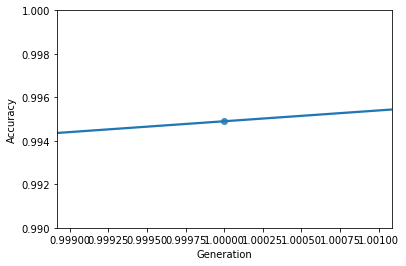

In [6]:
#Visualisation
df = pd.DataFrame(data =evalaccuris)
df.rename(columns={0: 'Generation',1:'Accuracy'}, inplace=True)
df
sns.regplot(x=df['Generation'],y=df['Accuracy'])
plt.ylim(0.990, 1)
